<a href="https://colab.research.google.com/github/Anishkumarpandey757/DL-projects-main/blob/main/dl3facemaskdetectioncnndl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#importing kaggle data set
!kaggle datasets download -d omkargurav/face-mask-dataset

 98% 160M/163M [00:04<00:00, 44.1MB/s]
100% 163M/163M [00:05<00:00, 33.8MB/s]


In [ ]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [ ]:
!pip install google-colab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.6 MB/s eta 0:00:00


In [ ]:
import os #acceseesing indore folders
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split


In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])

['with_mask_2066.jpg', 'with_mask_2276.jpg', 'with_mask_2576.jpg', 'with_mask_300.jpg', 'with_mask_2118.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')

In [ ]:
print(len(with_mask_files))
print(len(without_mask_files))

3725
3828


In [ ]:
#labelling
with_mask_label = [1]*3725
without_mask_label = [0]*3828
print(with_mask_label[0:5])
print(without_mask_label[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
labels = with_mask_label + without_mask_label  # it doesn't add like numpy it join the two list
print(len(labels))

7553


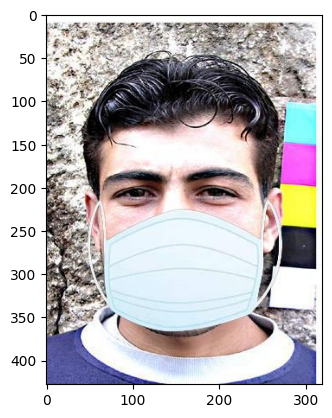

In [ ]:
img = mpimg.imread('/content/data/with_mask/with_mask_2066.jpg')
imgplot = plt.imshow(img)
plt.show()

image processing


In [ ]:
#coverting images to numpy arraays
with_mask_path = '/content/data/with_mask/'
data = []
for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


#coverting images to numpy arraays
without_mask_path = '/content/data/without_mask/'
for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[249, 249, 246],
        [250, 250, 248],
        [253, 253, 251],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [255, 255, 255]],

       ...,

       [[ 83,  86, 157],
        [ 82,  85, 156],
        [ 78,  81, 152],
        ...,
        [247, 248, 249],
        [255, 252, 252],
        [253, 253, 249]],

       [[ 91,  94, 165],
        [ 83,  86, 157],
        [ 85,  88, 159],
        ...,
        [246, 249, 249],
        [255, 253, 252],
        [252, 253, 249]],

       [[ 89,  92, 163],
        [ 85,  88, 159],
        [ 82,  85, 156],
        ...,
        [245, 250, 249],
        [254, 253, 252],
        [251, 253, 249]]], dtype=uint8)
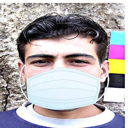

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
X = np.array(data)
Y = np.array(labels)

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


Train test split


In [ ]:


# Now split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

0 ---- black
255 ---- white

In [ ]:
#scaling
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
X_train_scaled[0]

array([[[0.35294118, 0.3254902 , 0.28627451],
        [0.35294118, 0.3254902 , 0.28627451],
        [0.35294118, 0.3254902 , 0.28627451],
        ...,
        [0.36862745, 0.36862745, 0.3372549 ],
        [0.34901961, 0.34901961, 0.31764706],
        [0.33333333, 0.33333333, 0.30196078]],

       [[0.35294118, 0.3254902 , 0.28627451],
        [0.35294118, 0.3254902 , 0.28627451],
        [0.35294118, 0.3254902 , 0.28627451],
        ...,
        [0.36862745, 0.36862745, 0.3372549 ],
        [0.35294118, 0.35294118, 0.32156863],
        [0.33333333, 0.33333333, 0.30196078]],

       [[0.35294118, 0.3254902 , 0.28627451],
        [0.35294118, 0.3254902 , 0.28627451],
        [0.35294118, 0.3254902 , 0.28627451],
        ...,
        [0.37254902, 0.37254902, 0.34117647],
        [0.35294118, 0.35294118, 0.32156863],
        [0.34117647, 0.34117647, 0.30980392]],

       ...,

       [[0.63529412, 0.45882353, 0.4745098 ],
        [0.70588235, 0.5254902 , 0.5372549 ],
        [0.73333333, 0

In [ ]:
#CNN
import tensorflow as td
from tensorflow import keras



In [ ]:
num_of_classes = 2
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))#from second layer the input shape no need to mention
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy'
              ,metrics=['acc'])
history = model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 [==============================] - 10s 24ms/step - loss: 0.4846 - acc: 0.7751 - val_loss: 0.3510 - val_acc: 0.8579
Epoch 2/5
170/170 [==============================] - 3s 20ms/step - loss: 0.2932 - acc: 0.8828 - val_loss: 0.2611 - val_acc: 0.9058
Epoch 3/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2549 - acc: 0.9003 - val_loss: 0.2803 - val_acc: 0.9074
Epoch 4/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2157 - acc: 0.9130 - val_loss: 0.2473 - val_acc: 0.9157
Epoch 5/5
170/170 [==============================] - 3s 18ms/step - loss: 0.1750 - acc: 0.9332 - val_loss: 0.2445 - val_acc: 0.9240


model evaluation

In [ ]:
loss , accuracy = model.evaluate(X_test_scaled,Y_test)
print(accuracy)

48/48 [==============================] - 1s 14ms/step - loss: 0.2085 - acc: 0.9173
0.9172733426094055


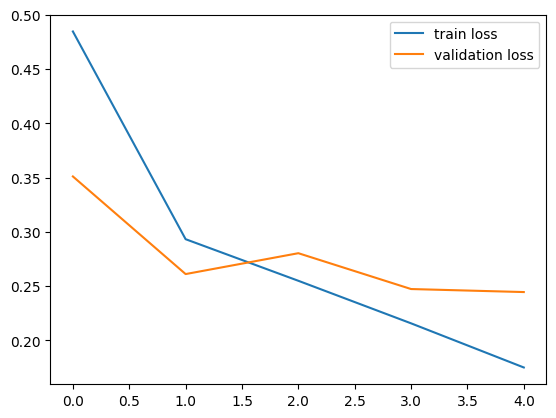

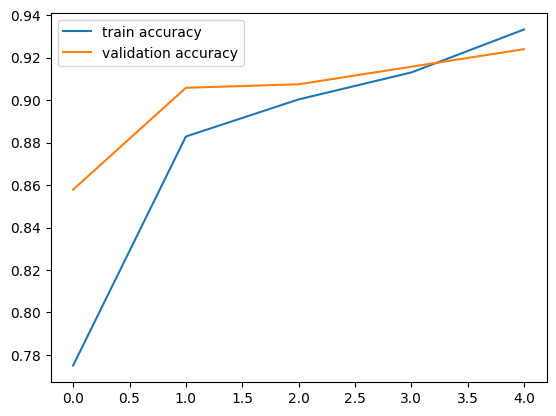

In [ ]:
h = history
#plot the loss
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()
#plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

predictive system

Path of the image to be predicted: /content/GettyImages-1191860851.jpg


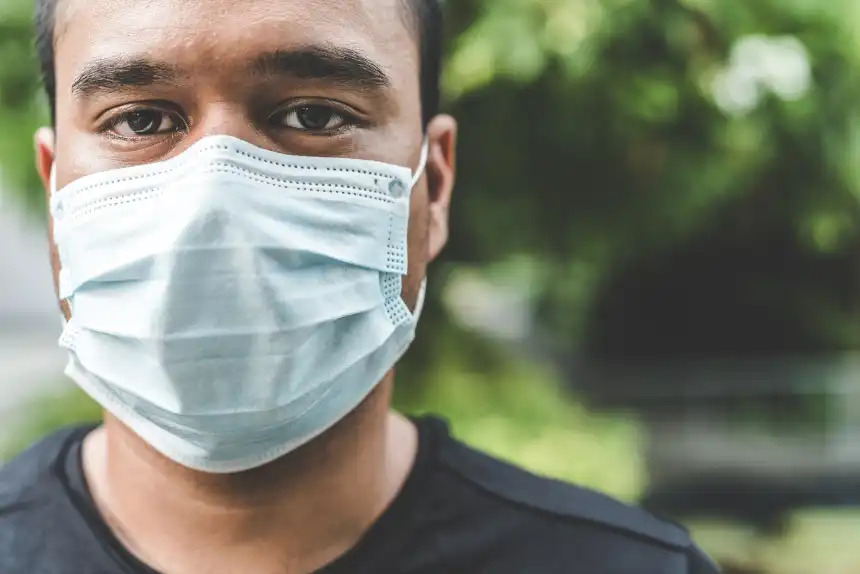

1/1 [==============================] - 0s 27ms/step
[[0.4118707  0.57393825]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')